## Install Packages and Import Libraries

In [37]:
from os.path import exists

from pandas import read_csv
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install fuzzywuzzy
!pip install sqlalchemy pyodbc
!pip install statsmodels
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'git' is not recognized as an internal or external command,
operable program or batch file.
'git' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from fuzzywuzzy import process
import math
from sqlalchemy import create_engine
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress only FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Suppress DeprecationWarnings

C:\Users\abdel\PycharmProjects\PythonProject\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Read Data and Check Up

In [3]:
# Define connection
server = 'RAVENLAPTOP'
database = 'IFC_AIMM'
username = 'RAVENLAPTOP/abdel'
password = ''
connection_string = f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'


# Create Engine
engine = create_engine(connection_string)

In [4]:
# Query to fetch the table
query = "SELECT * FROM Funded_African_Tech_Startups_2021_2023"

# Load the table into a Pandas DataFrame
with engine.connect() as connection:
    df = pd.read_sql_query(query, connection)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Startup                1604 non-null   object 
 1   Location               1604 non-null   object 
 2   Sector                 1604 non-null   object 
 3   Date                   1375 non-null   object 
 4   Amount_USD             985 non-null    float64
 5   Investors              1540 non-null   object 
 6   Stage                  1604 non-null   object 
 7   Debt_Equity            1604 non-null   object 
 8   Female_co_founder_CEO  1604 non-null   object 
 9   Local_founder          1604 non-null   object 
 10  Intnl_founder          1604 non-null   object 
 11  Launched               1604 non-null   object 
 12  Accelerator            1604 non-null   object 
 13  Employees              1604 non-null   int64  
 14  Funding_Year           1604 non-null   int64  
dtypes: f

## Clean Data

Align unique values using FuzzyWuzzy and manual dictionary setting

In [6]:
# Look at the number of unique values
df2 = df.copy()
for column in df2.columns:
    print(f"{column}: {df2[column].nunique()} unique values")

Startup: 1371 unique values
Location: 33 unique values
Sector: 99 unique values
Date: 63 unique values
Amount_USD: 261 unique values
Investors: 1007 unique values
Stage: 30 unique values
Debt_Equity: 10 unique values
Female_co_founder_CEO: 3 unique values
Local_founder: 2 unique values
Intnl_founder: 2 unique values
Launched: 19 unique values
Accelerator: 3 unique values
Employees: 221 unique values
Funding_Year: 3 unique values


In [7]:
# Select columns from the dataframe with more unique values than expected
columns_to_check = df2[['Sector', 'Stage', 'Debt_Equity', 'Female_co_founder_CEO', 'Accelerator']]

# Print distinct values
for column in columns_to_check:
    print(f"Distinct values in '{column}': {df2[column].unique()}")

Distinct values in 'Sector': ['fintech' 'e-commerce' 'retail-tech' 'e-health' 'logistics' 'ed-tech'
 'energy' 'agri-tech' 'transport' 'AI' 'entertainment' 'prop-tech'
 'marketing' '3D' 'e-reader' 'e-signature' 'field operations' 'fitness'
 'food delivery' 'infrastructure management' 'inspection management'
 'kitche-as-a-service' 'laundry' 'legal-tech' 'manufacturing' 'media'
 'on-demand' 'on-demand meals' 'online chef platform' 'procurement'
 'programme management' 'recruitment' 'restaurant tech' 'security'
 'semiconductors' 'social media' 'social network' 'startup support'
 'ticketing' 'travel/social network' 'unified communications' 'VFX'
 'waste management' 'will-maker' 'auto-tech' 'beauty' 'big data'
 'cloud kitche' 'communication' 'connectivity' 'construction'
 'corporate training' 'CRM' 'cybersecurity' 'data collaboration' 'dating'
 'developer tools' 'digital B2B concierge' 'digital identity' 'drones'
 'fintech ' 'recruitment and HR' 'AI/IoT' 'restaurant management'
 'app creatio

In [8]:
# Define the columns to align
columns_to_align = ['Sector', 'Stage', 'Debt_Equity', 'Female_co_founder_CEO', 'Accelerator']

# Create a function to align values in a column
def align_column_values(df2, column, threshold=90):

# Get unique values in the column
    unique_values = df2[column].dropna().unique()
    aligned_values = {}

# Align similar values based on a threshold
    for value in unique_values:
        match, score = process.extractOne(value, unique_values)
        if score >= threshold:
            aligned_values[value] = match
        else:
            aligned_values[value] = value

 # Map aligned values back to the column
    df2[column] = df2[column].map(aligned_values)
    return df2

# Apply alignment to the specified columns
for col in columns_to_align:
    df2 = align_column_values(df2, col)

In [9]:
# Print distinct values
for column in columns_to_check:
    print(f"Distinct values in '{column}': {df2[column].unique()}")

Distinct values in 'Sector': ['fintech' 'e-commerce' 'retail-tech' 'e-health' 'logistics' 'ed-tech'
 'energy' 'agri-tech' 'transport' 'AI' 'entertainment' 'prop-tech'
 'marketing' '3D' 'e-reader' 'e-signature' 'field operations' 'fitness'
 'food delivery' 'infrastructure management' 'inspection management'
 'kitche-as-a-service' 'laundry' 'legal-tech' 'manufacturing' 'media'
 'on-demand' 'on-demand meals' 'online chef platform' 'procurement'
 'programme management' 'recruitment' 'restaurant tech' 'security'
 'semiconductors' 'social media' 'social network' 'startup support'
 'ticketing' 'travel/social network' 'unified communications' 'VFX'
 'waste management' 'will-maker' 'auto-tech' 'beauty' 'big data'
 'cloud kitche' 'communication' 'connectivity' 'construction'
 'corporate training' 'CRM' 'cybersecurity' 'data collaboration' 'dating'
 'developer tools' 'digital B2B concierge' 'digital identity' 'drones'
 'recruitment and HR' 'AI/IoT' 'restaurant management' 'app creation'
 'blockch

In [10]:
# Define dictionary to align values
stage_mapping = {
    'Seed': 'Seed',
    'Pre-seed': 'Pre-seed',
    'Pe-seed': 'Pre-seed',
    'Pre-seed / Seed': 'Pre-seed',
    'Pre-seed/seed': 'Pre-seed',
    'Undisclosed': 'Undisclosed',
    'Undisclosed (strategic)': 'Undisclosed',
    'Undisclosed/ Series A2': 'Undisclosed',
    'Series A': 'Series A',
    'Series A / B': 'Series A',
    'Seed / Series A': 'Seed',
    'Seed + Pre-Series A': 'Seed',
    'Seed/bridge': 'Seed',
    'Bridge': 'Bridge',
    'Pre-Series A': 'Pre-Series A',
    'Pre-Series B': 'Pre-Series B',
    'Pre-Series B/Series B': 'Pre-Series B',
    'Pre-Series C': 'Pre-Series C',
    'Series B': 'Series B',
    'Series C': 'Series C',
    'Series D': 'Series D',
    'Strategic': 'Strategic',
    'Series A, P1 Ventures, Angel investors': 'Series A',
    'Series A / Series B': 'Series A'
}

debt_equity_mapping = {
    'Equity': 'Equity',
    'Equity/Debt': 'Equity/Debt',
    'Equity + debt': 'Equity/Debt',
    'Equity, debt': 'Equity/Debt',
    'Debt': 'Debt',
    'Debt/equity': 'Equity/Debt',
    'Non-Equity': 'Debt'
}

sector_mapping_generalized = {
    # Finance & Fintech
    'fintech': 'Finance & Fintech',

    # E-commerce & Retail
    'e-commerce': 'E-commerce & Retail',
    'retail-tech': 'E-commerce & Retail',
    'e-commerce and retail-tech': 'E-commerce & Retail',

    # Healthcare & Health-tech
    'e-health': 'Healthcare & Health-tech',
    'Healthcare': 'Healthcare & Health-tech',
    'eyecare': 'Healthcare & Health-tech',
    'fitness': 'Healthcare & Health-tech',

    # Logistics & Transport
    'logistics': 'Logistics & Transport',
    'transport': 'Logistics & Transport',

    # Education & Training
    'ed-tech': 'Education & Training',
    'corporate training': 'Education & Training',

    # Energy & Environment
    'energy': 'Energy & Environment',
    'waste management': 'Energy & Environment',
    'clean-tech': 'Energy & Environment',
    'climate-tech': 'Energy & Environment',
    'conservation': 'Energy & Environment',

    # Agriculture & Agri-tech
    'agri-tech': 'Agriculture & Agri-tech',

    # Technology & AI
    'AI': 'Technology & AI',
    '3D': 'Technology & AI',
    'e-reader': 'Technology & AI',
    'e-signature': 'Technology & AI',
    'infrastructure management': 'Technology & AI',
    'inspection management': 'Technology & AI',
    'security': 'Technology & AI',
    'semiconductors': 'Technology & AI',
    'communication': 'Technology & AI',
    'connectivity': 'Technology & AI',
    'cybersecurity': 'Technology & AI',
    'data collaboration': 'Technology & AI',
    'developer tools': 'Technology & AI',
    'digital identity': 'Technology & AI',
    'drones': 'Technology & AI',
    'AI/IoT': 'Technology & AI',
    'blockchain/web3': 'Technology & AI',
    'big data': 'Technology & AI',
    'developer tooling': 'Technology & AI',
    'presentation-tech': 'Technology & AI',
    'privacy': 'Technology & AI',
    'smartphones': 'Technology & AI',
    'Software': 'Technology & AI',
    'super app': 'Technology & AI',
    'digital business cards': 'Technology & AI',
    'app creation': 'Technology & AI',
    'unified communications': 'Technology & AI',
    'webhook service': 'Technology & AI',

    # Media & Entertainment
    'entertainment': 'Media & Entertainment',
    'media': 'Media & Entertainment',
    'social media': 'Media & Entertainment',
    'social network': 'Media & Entertainment',
    'ticketing': 'Media & Entertainment',
    'VFX': 'Media & Entertainment',
    'e-sports': 'Media & Entertainment',
    'travel/social network': 'Media & Entertainment',

    # Real Estate & Prop-tech
    'prop-tech': 'Real Estate & Prop-tech',
    'construction': 'Real Estate & Prop-tech',
    'construction tech': 'Real Estate & Prop-tech',

    # Advertising & Marketing
    'marketing': 'Advertising & Marketing',

    # Food & Beverage
    'food delivery': 'Food & Beverage',
    'kitchen-as-a-service': 'Food & Beverage',
    'cloud kitchen': 'Food & Beverage',
    'food platform': 'Food & Beverage',
    'restaurant tech': 'Food & Beverage',
    'restaurant management': 'Food & Beverage',
    'on-demand meals': 'Food & Beverage',
    'online chef platform': 'Food & Beverage',
    'cloud kitche': 'Food & Beverage',

    # Automotive & Mobility
    'auto-tech': 'Automotive & Mobility',

    # Lifestyle & Social
    'beauty': 'Lifestyle & Beauty',
    'funeral services': 'Lifestyle & Social',
    'interior design': 'Lifestyle & Beauty',
    'dating': 'Lifestyle & Social',

    # Home Services
    'home services': 'Home Services',
    'laundry': 'Home Services',

    # Manufacturing & Industry
    'manufacturing': 'Manufacturing & Industry',

    # Travel & Tourism
    'tourism': 'Travel & Tourism',
    'travel': 'Travel & Tourism',
    'travel-tech': 'Travel & Tourism',

    # Legal & Compliance
    'legal-tech': 'Legal & Compliance',
    'will-maker': 'Legal & Compliance',

    # Business Services
    'procurement': 'Business Services',
    'programme management': 'Business Services',
    'program management': 'Business Services',
    'CRM': 'Business Services',
    'trade-tech': 'Business Services',
    'market research': 'Business Services',
    'digital B2B concierge': 'Business Services',
    'B2B-tech': 'Business Services',

    # HR & Recruitment
    'recruitment': 'HR & Recruitment',
    'recruitment and HR': 'HR & Recruitment',

    # Services & On-demand
    'on-demand': 'Services & On-demand',

    # Other
    'startup support': 'Other',
    'field operations': 'Other',
    'copyright management': 'Other',
    'bug reporting': 'Other',
    'forecourt automation': 'Other',
    'ISP': 'Other',
    'Senegal': 'Other',
    'other': 'Other',
}

df2['Stage'] = df2['Stage'].map(stage_mapping)
df2['Debt_Equity'] = df2['Debt_Equity'].map(debt_equity_mapping)
df2['Sector'] = df2['Sector'].map(sector_mapping_generalized).fillna('Other')

In [11]:
if 'Date' in df2.columns:
    df2.drop(columns=['Date'], inplace=True)

In [12]:
# Display the updated DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Startup                1604 non-null   object 
 1   Location               1604 non-null   object 
 2   Sector                 1604 non-null   object 
 3   Amount_USD             985 non-null    float64
 4   Investors              1540 non-null   object 
 5   Stage                  1604 non-null   object 
 6   Debt_Equity            1604 non-null   object 
 7   Female_co_founder_CEO  1604 non-null   object 
 8   Local_founder          1604 non-null   object 
 9   Intnl_founder          1604 non-null   object 
 10  Launched               1604 non-null   object 
 11  Accelerator            1604 non-null   object 
 12  Employees              1604 non-null   int64  
 13  Funding_Year           1604 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 175.6+

This looks good for cleaning the data within the columns we can move onto addressing data types

## Check Duplicates

In [13]:
# Check for duplicate rows across all columns
duplicates = df2[df2.duplicated(keep=False)]

print("Duplicate rows in the DataFrame:")
print(duplicates)

duplicate_count = df2.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_count}")

Duplicate rows in the DataFrame:
           Startup Location           Sector  Amount_USD  \
1130  The Food Lab    Egypt  Food & Beverage   4500000.0   
1138  The Food Lab    Egypt  Food & Beverage   4500000.0   

                                              Investors     Stage Debt_Equity  \
1130  co-led by Nuwa Capital, Shorooq Partners and 4...  Pre-seed      Equity   
1138  co-led by Nuwa Capital, Shorooq Partners and 4...  Pre-seed      Equity   

     Female_co_founder_CEO Local_founder Intnl_founder Launched Accelerator  \
1130                    No           Yes            No     2020         Yes   
1138                    No           Yes            No     2020         Yes   

      Employees  Funding_Year  
1130         96          2022  
1138         96          2022  
Total number of duplicate rows: 1


In [14]:
df2 = df2.drop_duplicates()
print(f"DataFrame shape after dropping duplicates: {df2.shape}")

DataFrame shape after dropping duplicates: (1603, 14)


## Data Types

In [15]:
df2['Launched'] = df2['Launched'].astype('category')
df2['Stage'] = df2['Stage'].astype('category')
df2['Location'] = df2['Location'].astype('category')
df2['Sector'] = df2['Sector'].astype('category')
df2['Debt_Equity'] = df2['Debt_Equity'].astype('category')
df2['Funding_Year'] = df2['Funding_Year'].astype('category')

In [16]:
# One-hot map yes/no columns to boolean values
yes_no_columns = [
    'Female_co_founder_CEO',
    'Local_founder',
    'Intnl_founder',
    'Accelerator'
                        ]
for col in yes_no_columns:
    df2[col] = df2[col].map({'Yes': True, 'No': False}).astype(bool)

In [17]:
for column in columns_to_check:
    print(f"Distinct values in '{column}': {df2[column].unique()}")

Distinct values in 'Sector': ['Finance & Fintech', 'E-commerce & Retail', 'Healthcare & Health-tech', 'Logistics & Transport', 'Education & Training', ..., 'HR & Recruitment', 'Automotive & Mobility', 'Lifestyle & Beauty', 'Lifestyle & Social', 'Travel & Tourism']
Length: 23
Categories (23, object): ['Advertising & Marketing', 'Agriculture & Agri-tech', 'Automotive & Mobility', 'Business Services', ..., 'Real Estate & Prop-tech', 'Services & On-demand', 'Technology & AI', 'Travel & Tourism']
Distinct values in 'Stage': ['Seed', 'Pre-seed', 'Undisclosed', 'Series A', 'Bridge', ..., 'Series B', 'Pre-Series B', 'Strategic', 'Pre-Series C', 'Series D']
Length: 12
Categories (12, object): ['Bridge', 'Pre-Series A', 'Pre-Series B', 'Pre-Series C', ..., 'Series C', 'Series D', 'Strategic', 'Undisclosed']
Distinct values in 'Debt_Equity': ['Equity', 'Equity/Debt', 'Debt']
Categories (3, object): ['Debt', 'Equity', 'Equity/Debt']
Distinct values in 'Female_co_founder_CEO': [ True False]
Distinc

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1603 entries, 0 to 1603
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Startup                1603 non-null   object  
 1   Location               1603 non-null   category
 2   Sector                 1603 non-null   category
 3   Amount_USD             984 non-null    float64 
 4   Investors              1539 non-null   object  
 5   Stage                  1603 non-null   category
 6   Debt_Equity            1603 non-null   category
 7   Female_co_founder_CEO  1603 non-null   bool    
 8   Local_founder          1603 non-null   bool    
 9   Intnl_founder          1603 non-null   bool    
 10  Launched               1603 non-null   category
 11  Accelerator            1603 non-null   bool    
 12  Employees              1603 non-null   int64   
 13  Funding_Year           1603 non-null   category
dtypes: bool(4), category(6), float64(1), int64(1)

## Exploratory Data Analysis

In [19]:
# Let's see the central tendency measures / distribution for the numerical columns (Amount and Employees)
df2.describe()

,Amount_USD,Employees
count,9.840000e+02,1603.000000
mean,7.514482e+06,48.427948
std,2.659484e+07,124.394560
min,1.000000e+04,0.000000
25%,1.625000e+05,7.000000
50%,1.160000e+06,16.000000
75%,4.425000e+06,38.000000
max,5.100000e+08,1949.000000


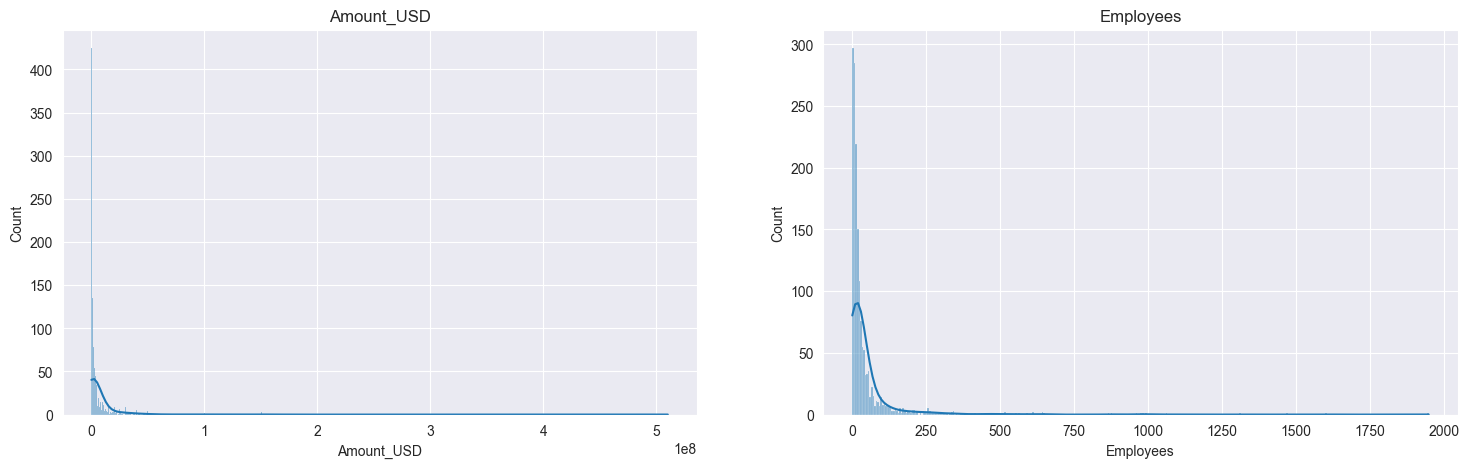

In [20]:
# Visual Distribution of numerical columns values
discol = ['Amount_USD', 'Employees']

# Set up dimensions
columns_per_row = 2
num_columns = len(discol)
num_rows = math.ceil(num_columns/columns_per_row)
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, 5 * num_rows))
axes = axes.flatten()

# Visualizaiton parameters
for i, col in enumerate(discol):
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

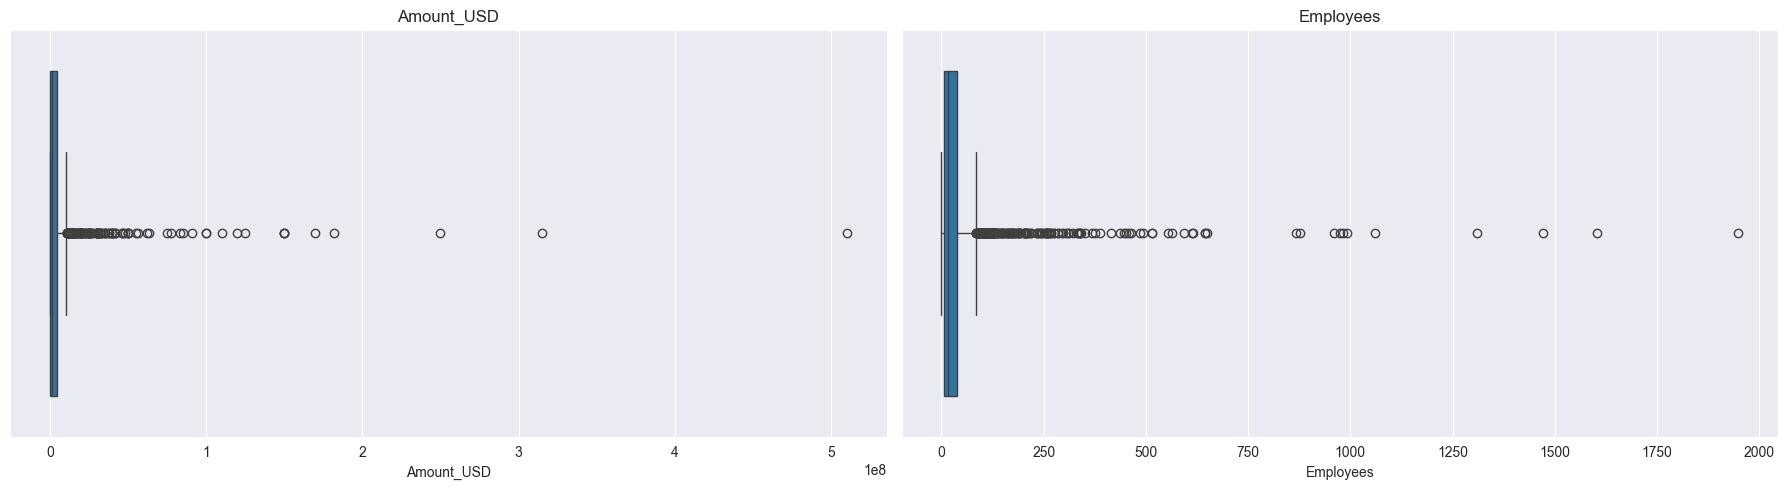

In [21]:
columns_per_row = 2
num_columns = len(discol)
num_rows = math.ceil(num_columns / columns_per_row)

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for ax, col in zip(axes, discol):
    sns.boxplot(x=df2[col], ax=ax)
    ax.set_title(col)

for j in range(len(discol), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Data are heavily skewed to the right implying that most cases lean to the lower bound of the range compared to outliers with extremely high values to the positive side.

In [22]:
# Let's look at the outliers
Amount_Outliers = df2[(df2['Amount_USD'] > 100000000)]
Amount_Outliers

,Startup,Location,Sector,Amount_USD,Investors,Stage,Debt_Equity,Female_co_founder_CEO,Local_founder,Intnl_founder,Launched,Accelerator,Employees,Funding_Year
18,Flutterwave,Nigeria,Finance & Fintech,170000000.0,"Avenir Growth Capital, Tiger Global, DST Globa...",Series C,Equity,False,True,False,2016,False,322,2021
89,MNT-Halan,Egypt,Finance & Fintech,120000000.0,"Apis Growth Fund II, Development Partners Inte...",Undisclosed,Equity,False,True,False,2018,False,246,2021
251,TradeDepot,Nigeria,E-commerce & Retail,110000000.0,"International Finance Corporation (IFC), with ...",Series B,Equity/Debt,False,True,False,2016,False,247,2021
572,Moove,Nigeria,Finance & Fintech,181800000.0,"NBK Capital Partners (February), Speedinvest, ...",Undisclosed,Equity/Debt,False,False,True,2019,False,180,2022
576,Flutterwave,Nigeria,Finance & Fintech,250000000.0,"Led by B Capital Group, the US$250 million Ser...",Series D,Equity,False,True,False,2016,False,459,2022
665,MNT-Halan,Egypt,Finance & Fintech,150000000.0,Commercial International Bank,Undisclosed,Debt,False,True,False,2018,False,98,2022
825,Wasoko,Kenya,E-commerce & Retail,125000000.0,"Tiger Global, the world’s largest venture capi...",Series B,Equity,False,False,True,2016,True,645,2022
1183,Yassir,Algeria,Technology & AI,150000000.0,"BOND, with participation from DN Capital, Dors...",Series B,Equity,False,True,False,2017,True,649,2022
1208,MNT-Halan,Egypt,Finance & Fintech,510000000.0,"Chimera Abu Dhabi, Commercial International Ba...",Undisclosed,Equity/Debt,False,True,False,2018,False,274,2023
1490,Sun King (Greenlight Planet),Kenya,Energy & Environment,150000000.0,"British International Investment (ex CDC), Sta...",Undisclosed,Debt,False,True,False,2007,False,1604,2023


In [23]:
Employees_Outlier = df2[(df2['Employees'] > 750)]
Employees_Outlier

,Startup,Location,Sector,Amount_USD,Investors,Stage,Debt_Equity,Female_co_founder_CEO,Local_founder,Intnl_founder,Launched,Accelerator,Employees,Funding_Year
660,Paymob,Egypt,Finance & Fintech,50000000.0,"led by PayPal Ventures, Kora Capital, and Clay...",Series B,Equity,False,True,False,2015,True,959,2022
691,Watu Credit,Kenya,Finance & Fintech,7000000.0,Verdant Capital,Undisclosed,Equity,False,True,False,2015,False,1310,2022
787,MaxAB,Egypt,E-commerce & Retail,40000000.0,"Silver Lake, British International Investment ...",Pre-Series B,Equity,False,True,False,2018,True,1060,2022
978,M-KOPA,Kenya,Energy & Environment,75000000.0,Generation Investment Management and Broadscal...,Undisclosed,Equity,False,False,True,2011,False,1471,2022
1017,Swvl,Egypt,Logistics & Transport,21500000.0,European Bank for Reconstruction and Developme...,Undisclosed,Equity,False,True,False,2017,True,981,2022
1336,Copia Global,Kenya,E-commerce & Retail,20000000.0,"Enza Capital, LGT, Goodwell Investments, U.S. ...",Series C,Equity,True,False,True,2010,False,878,2023
1449,Apollo Agriculture,Kenya,Agriculture & Agri-tech,NaN,None,Undisclosed,Equity,False,True,True,2016,False,868,2023
1464,Twiga Foods,Kenya,Agriculture & Agri-tech,35000000.0,"Creadev, Juven, TLCom Capital, DOB Equity",Undisclosed,Equity,False,True,False,2014,False,991,2023
1490,Sun King (Greenlight Planet),Kenya,Energy & Environment,150000000.0,"British International Investment (ex CDC), Sta...",Undisclosed,Debt,False,True,False,2007,False,1604,2023
1492,d.light,Kenya,Energy & Environment,30130000.0,"Lendahand (February), Swedfund (April), Lendah...",Undisclosed,Equity/Debt,True,True,False,2007,False,975,2023


In [24]:
# Examine distribution of Categorical and Boolean Columns
df2.describe(include=['category','bool'])

,Location,Sector,Stage,Debt_Equity,Female_co_founder_CEO,Local_founder,Intnl_founder,Launched,Accelerator,Funding_Year
count,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603
unique,33,23,12,3,2,2,2,19,2,3
top,Nigeria,Finance & Fintech,Undisclosed,Equity,False,True,False,2021,False,2022
freq,465,517,840,1509,1245,1489,1408,321,862,633


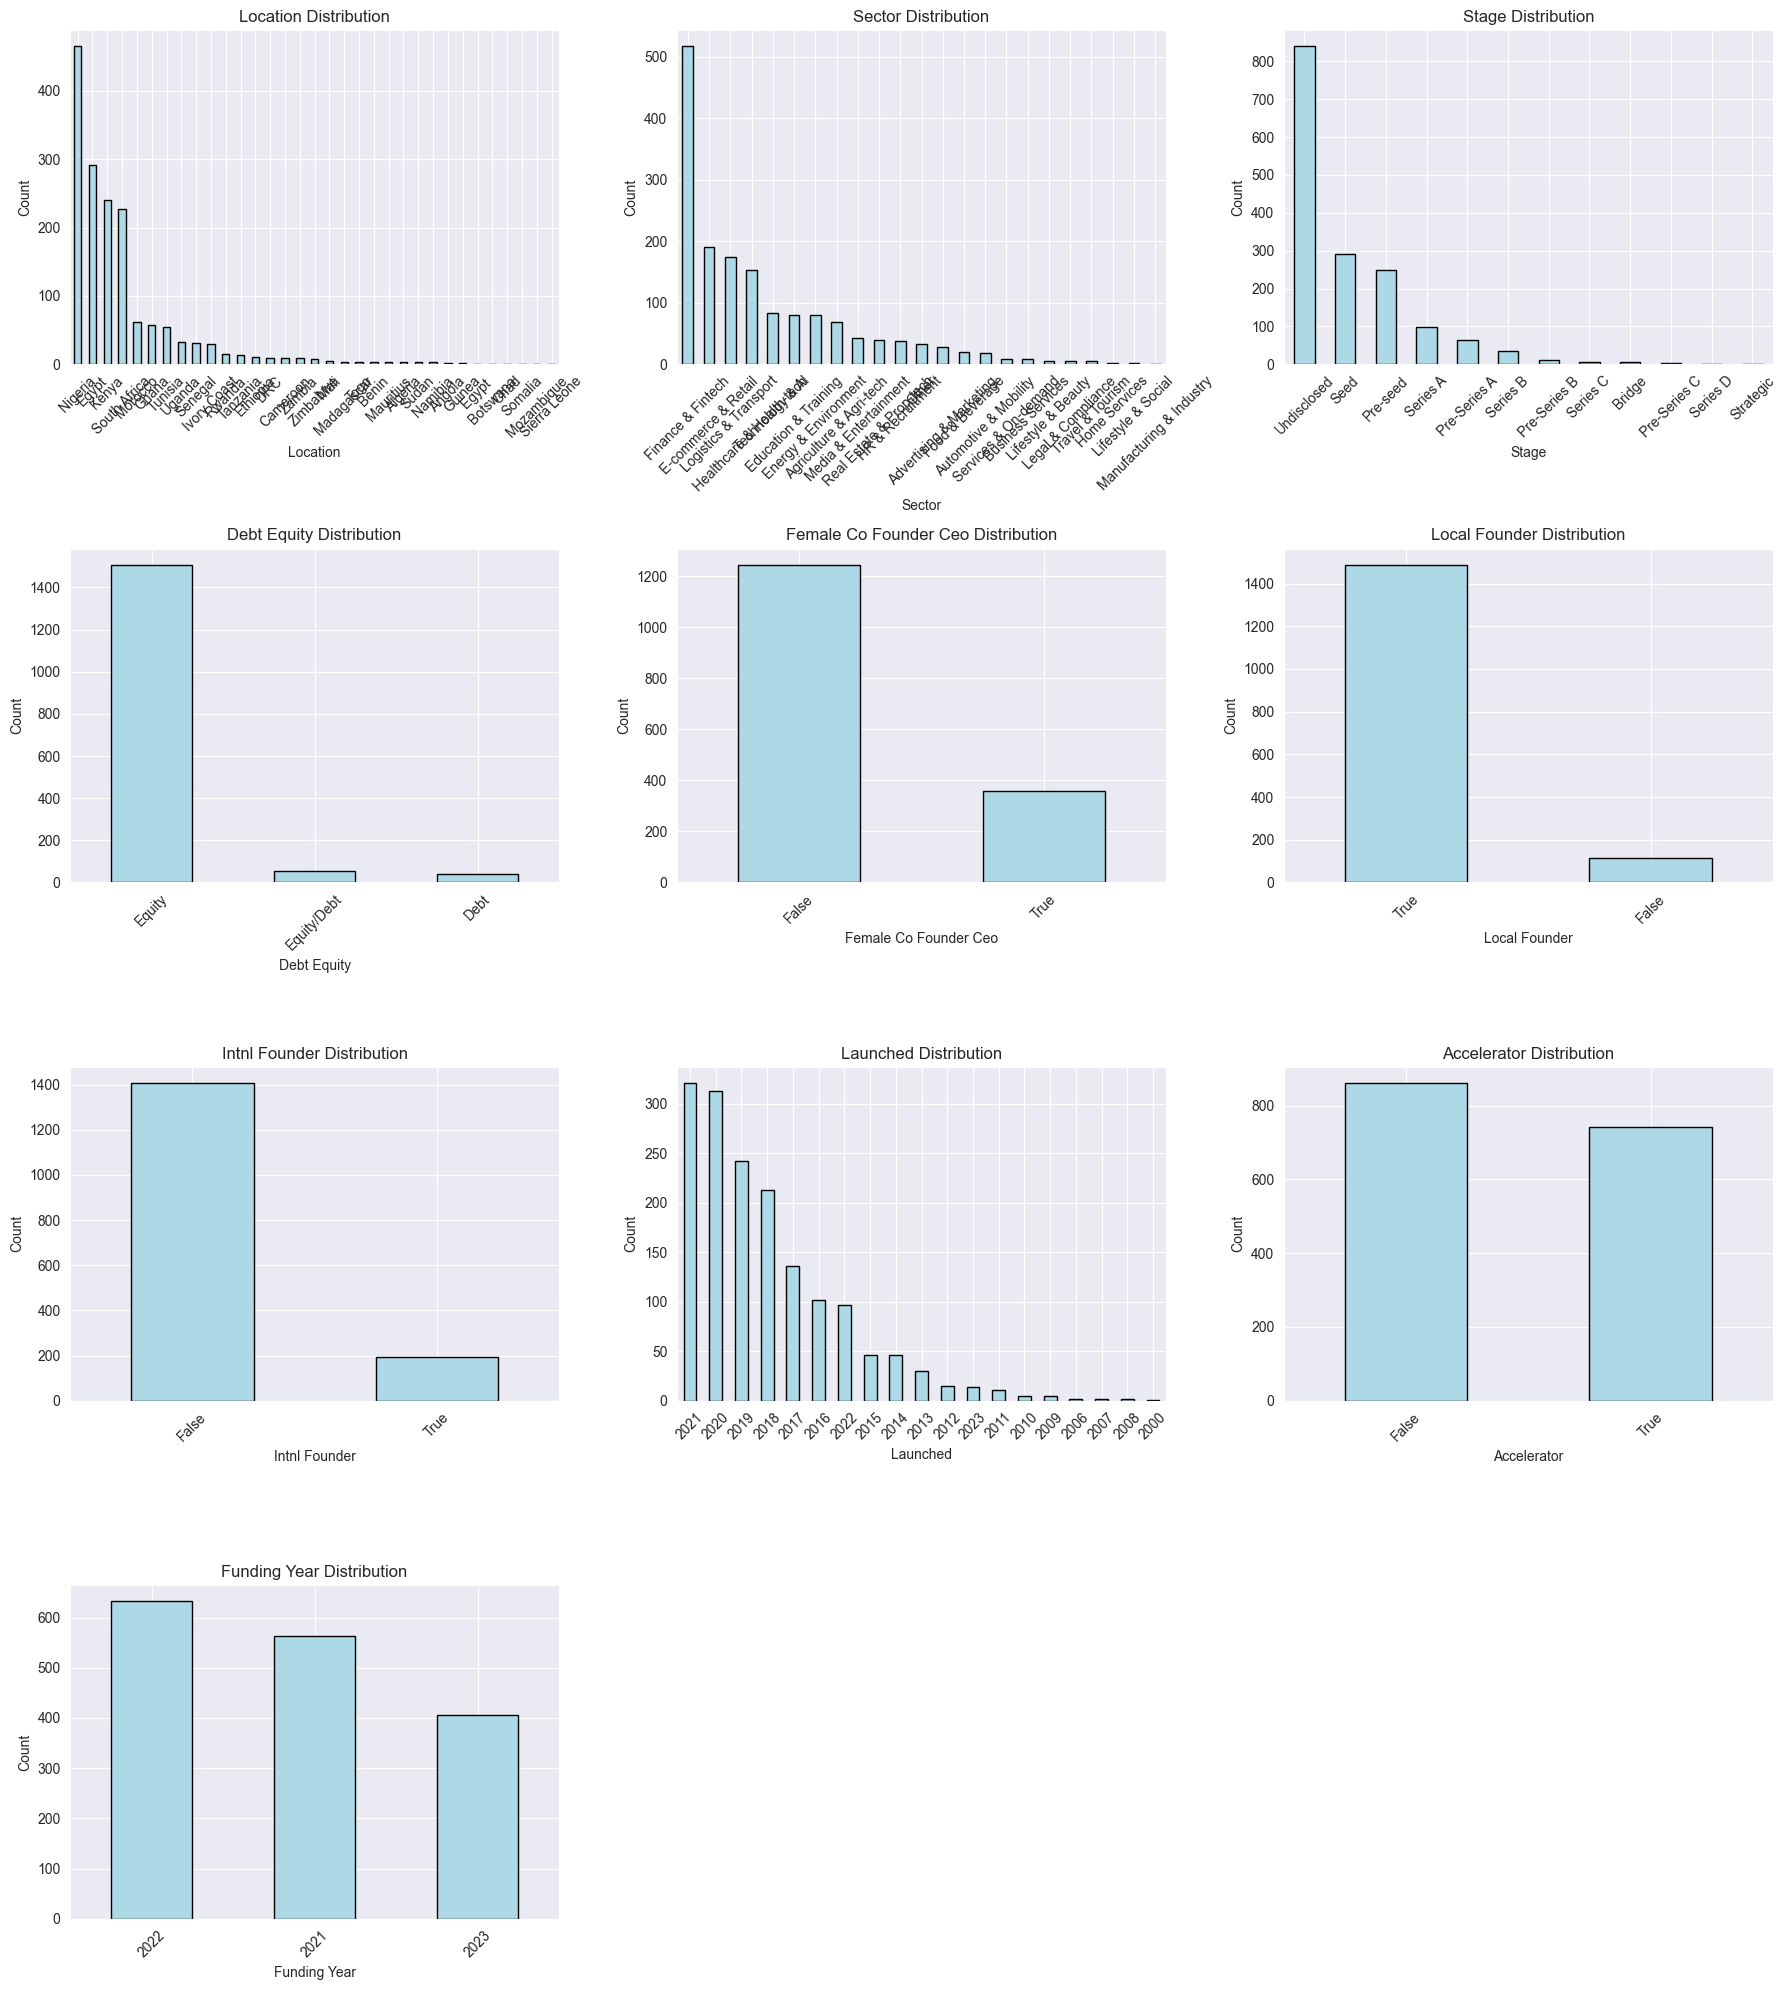

In [25]:
categorical_columns = df2.select_dtypes(include=['category', 'bool']).columns

# Identify parameters for overarching plot
columns_per_row = 3
num_columns = len(categorical_columns)
num_rows = math.ceil(num_columns / columns_per_row)
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, 5 * num_rows))
axes = axes.flatten()

# Create a bar plot for each categorical column
for i, col in enumerate(categorical_columns):
    # Count occurrences in the categorical column
    counts = df2[col].value_counts()

    # Plot a bar chart
    counts.plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black')

    # Set plot titles and labels
    axes[i].set_title(f'{col.replace("_", " ").title()} Distribution')
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes if the number of columns is less than the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Correlation Examination

In [26]:
encoded_df2 = df2.copy()

# Encode boolean columns as integers
boolean_columns = encoded_df2.select_dtypes(include=['bool']).columns
encoded_df2[boolean_columns] = encoded_df2[boolean_columns].astype(int)

# Encode categorical columns using LabelEncoder
categorical_columns = encoded_df2.select_dtypes(include=['category', 'object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    encoded_df2[col] = le.fit_transform(encoded_df2[col].astype(str))  # Convert to strings and encode
    label_encoders[col] = le  # Store encoders for potential inverse transformation

# Compute the correlation matrix with encoded data
correlation_matrix = encoded_df2.corr()

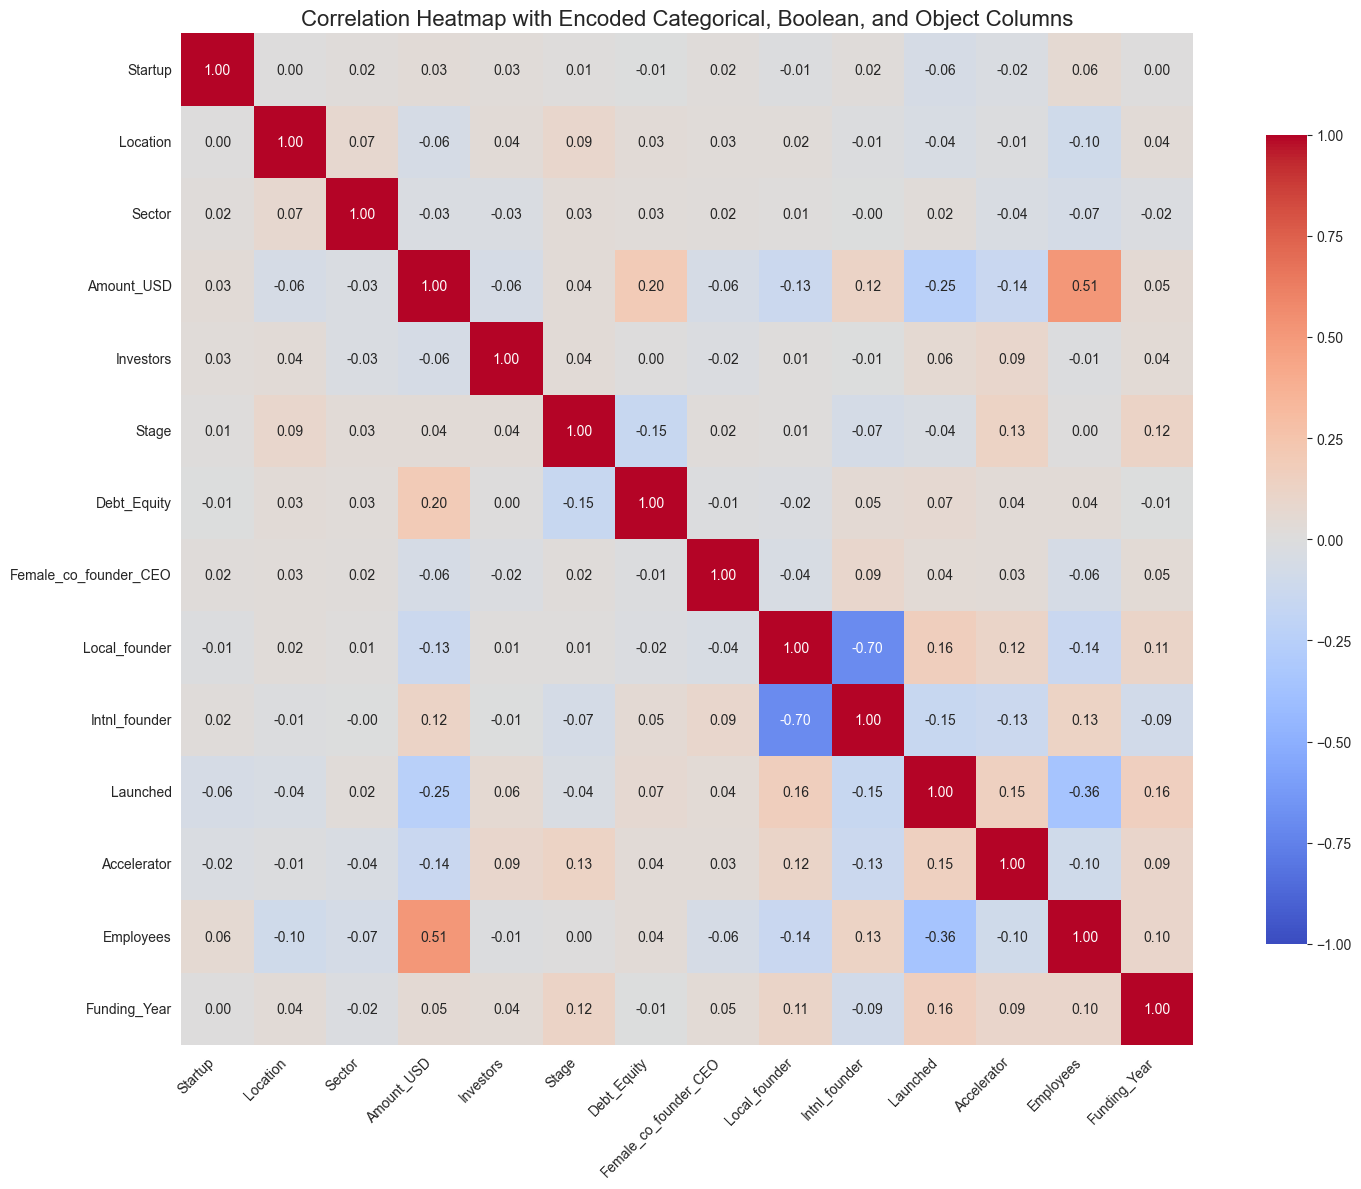

In [27]:
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 10})
plt.title('Correlation Heatmap with Encoded Categorical, Boolean, and Object Columns', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

A bilateral examination of the variables show no significant relationships except the following:
1. A moderate positive relationship between the number of employees and the amount of funding received in year 2023
2. A moderate negative relationship between the year of launch and the number of employees
3. A weak negative relationship between the year of launch and the amount funded
3. A strong negative relationship between having an international and local founder

## Addressing Missing Data

Due to the absence of strong bilateral relationships, we will proceed with addressing missing data without utilizing correlation.

In [28]:
missing_data = df2.isnull().sum()

# Percentage of missing values
missing_percentage = (df2.isnull().sum() / len(df2)) * 100

# Display missing data summary
missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_summary)

                       Missing Count  Missing Percentage
Startup                            0            0.000000
Location                           0            0.000000
Sector                             0            0.000000
Amount_USD                       619           38.615097
Investors                         64            3.992514
Stage                              0            0.000000
Debt_Equity                        0            0.000000
Female_co_founder_CEO              0            0.000000
Local_founder                      0            0.000000
Intnl_founder                      0            0.000000
Launched                           0            0.000000
Accelerator                        0            0.000000
Employees                          0            0.000000
Funding_Year                       0            0.000000


In [29]:
# Replace NaN values in the 'investors' column with "not announced"
df2['Investors'] = df2['Investors'].fillna("NA")
# Replace NaN value in the 'Employees' column with the most appropriate central tendency measure, the median since data is skewed
df2['Employees'] = df2['Employees'].fillna(df2['Employees'].median())

Since a significant portion of the data related to amount is missing (41.6%), we will predict the values using a machine learning program.

In [30]:
# Prepare data
train_data = df2[df2['Amount_USD'].notnull()]
test_data = df2[df2['Amount_USD'].isnull()]

X_train = train_data.drop(columns=['Amount_USD'])
y_train = train_data['Amount_USD']
X_test = test_data.drop(columns=['Amount_USD'])

# Encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict missing values
df2.loc[df2['Amount_USD'].isnull(), 'Amount_USD'] = model.predict(X_test)

Now that we have predicted the missing amounts, we should see if correlation variables have highly been impacted, if results are similar to earlier, then we can proceed with analysis.

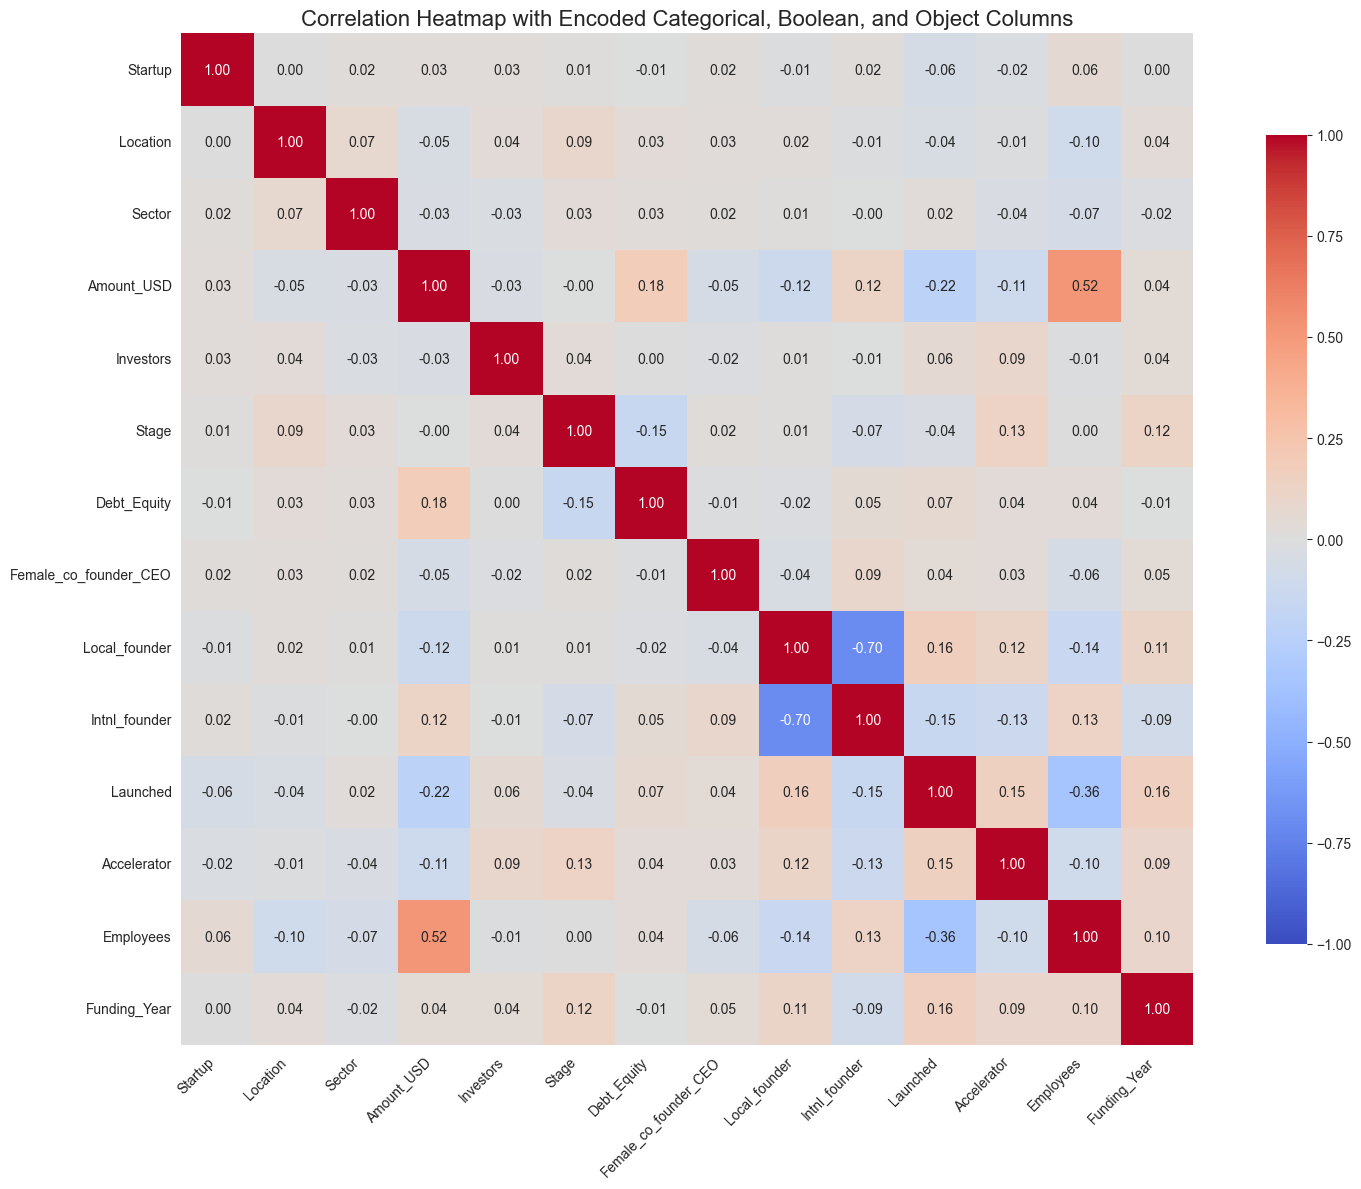

In [31]:
encoded_df2 = df2.copy()

# Encode boolean columns as integers
boolean_columns = encoded_df2.select_dtypes(include=['bool']).columns
encoded_df2[boolean_columns] = encoded_df2[boolean_columns].astype(int)

# Encode categorical columns using LabelEncoder
categorical_columns = encoded_df2.select_dtypes(include=['category', 'object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    encoded_df2[col] = le.fit_transform(encoded_df2[col].astype(str))  # Convert to strings and encode
    label_encoders[col] = le  # Store encoders for potential inverse transformation

# Compute the correlation matrix with encoded data
correlation_matrix = encoded_df2.corr()
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 10})
plt.title('Correlation Heatmap with Encoded Categorical, Boolean, and Object Columns', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [32]:
missing_data = df2.isnull().sum()

# Percentage of missing values
missing_percentage = (df2.isnull().sum() / len(df2)) * 100

# Display missing data summary
missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_summary)

                       Missing Count  Missing Percentage
Startup                            0                 0.0
Location                           0                 0.0
Sector                             0                 0.0
Amount_USD                         0                 0.0
Investors                          0                 0.0
Stage                              0                 0.0
Debt_Equity                        0                 0.0
Female_co_founder_CEO              0                 0.0
Local_founder                      0                 0.0
Intnl_founder                      0                 0.0
Launched                           0                 0.0
Accelerator                        0                 0.0
Employees                          0                 0.0
Funding_Year                       0                 0.0


## Save Clean Data to SQL library

After cleaning the data we can transmit it to SSMS as a table in the Africa_Tech_Startups database using SQL alchemy

In [33]:
# Define connection
server = 'RAVENLAPTOP'
database = 'IFC_AIMM'
username = 'RAVENLAPTOP/abdel'
password = ''
connection_string = f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'


# Create Engine
engine = create_engine(connection_string)

#Save Table
table_name = '2021-2023_PowerBI_Ready'
df2.to_sql('2021-2023_PowerBI_Ready', con=engine, if_exists='replace', index=False)

print(f"Data saved successfully to table '{table_name}' in the database '{database}'.")

Data saved successfully to table '2021-2023_PowerBI_Ready' in the database 'IFC_AIMM'.


Now the cleaned data with no missing values are available to be visualized in a PowerBI dashboard that we will connect to SSMS

## Regression Analysis

Now we have clean data, we can move into doing some econometrics. Since we are working on funding of the year 2023, we need to be very careful about the direction of causality. and interpreting the results.

## 1. Direct Impact

In [34]:
# 1.A. Economic Impact
# Relationship to Explore: How does Amount (US$) influence Employees?

categorical_vars = ['Sector', 'Location']
numeric_vars = ['Amount_USD']

# Preprocessing categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(ohe.fit_transform(df2[categorical_vars]), columns=ohe.get_feature_names_out(categorical_vars))

# Combine processed categorical and numeric variables
X = pd.concat([encoded_cats, df2[numeric_vars].reset_index(drop=True)], axis=1)

# Add a constant for the regression model
X = sm.add_constant(X)

# Define the dependent variable
y = df2['Employees']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

ValueError: The indices for endog and exog are not aligned

In [104]:
# 1.B. Startup Maturity and Employment

categorical_vars = ['Sector', 'Location']
numeric_vars = ['Amount (US$)', 'Launched?']

# Preprocessing categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(ohe.fit_transform(df2[categorical_vars]), columns=ohe.get_feature_names_out(categorical_vars))

# Combine processed categorical and numeric variables
X = pd.concat([encoded_cats, df2[numeric_vars].reset_index(drop=True)], axis=1)

# Add a constant for the regression model
X = sm.add_constant(X)

# Define the dependent variable
y = df2['Employees']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

KeyError: "None of [Index(['Amount (US$)', 'Launched?'], dtype='object')] are in the [columns]"

In [32]:
# Preprocessing categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(ohe.fit_transform(df2[categorical_vars]), columns=ohe.get_feature_names_out(categorical_vars))

# Combine processed categorical and numeric variables
X = pd.concat([encoded_cats, df2[numeric_vars].reset_index(drop=True)], axis=1)

# Add a constant for the regression model
X = sm.add_constant(X)

# Define the dependent variable
y = df2['Employees']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     3.326
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           5.98e-11
Time:                        23:33:14   Log-Likelihood:                -2506.5
No. Observations:                 406   AIC:                             5111.
Df Residuals:                     357   BIC:                             5307.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [33]:
# 1.C. Stage and Employment
# Variables to include in the model
categorical_vars = ['Sector', 'Location', 'Stage']
numeric_vars = ['Amount (US$)', 'Launched?']

# Preprocessing categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(ohe.fit_transform(df2[categorical_vars]), columns=ohe.get_feature_names_out(categorical_vars))

# Combine processed categorical and numeric variables
X = pd.concat([encoded_cats, df2[numeric_vars].reset_index(drop=True)], axis=1)

# Add a constant for the regression model
X = sm.add_constant(X)

# Define the dependent variable
y = df2['Employees']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     3.467
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           8.70e-13
Time:                        23:33:14   Log-Likelihood:                -2491.7
No. Observations:                 406   AIC:                             5097.
Df Residuals:                     349   BIC:                             5326.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## 2. Inclusivity Metrics

In [34]:
# 2.A.1 Does having a Female co-founder or Female CEO affect the Amount (US$) raised?

# Convert Boolean Values to integers for regression
df2['Female co-founder?'] = df2['Female co-founder?'].astype(int)
df2['Female CEO?'] = df2['Female CEO?'].astype(int)

threshold = 1_000_000
df2['High_Funding'] = (df2['Amount (US$)'] > threshold).astype(int)

# Define independent variables
X_gender = df2[['Female co-founder?', 'Female CEO?']]
X_gender = sm.add_constant(X_gender)  # Add constant

# Define dependent variable
y_high_funding = df2['High_Funding']

# Fit logistic regression model
logit_model = sm.Logit(y_high_funding, X_gender).fit()

# Print the summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.690251
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           High_Funding   No. Observations:                  406
Model:                          Logit   Df Residuals:                      403
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                0.003742
Time:                        23:33:14   Log-Likelihood:                -280.24
converged:                       True   LL-Null:                       -281.29
Covariance Type:            nonrobust   LLR p-value:                    0.3490
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0094      0.116      0.082      0.935      -0.217       0.236
Femal

In [35]:
# 2.A.2 Do startups led by Female co-founders or Female CEOs employ more Employees?

# Define independent variables
X_employment_gender = df2[['Female co-founder?', 'Female CEO?']]
X_employment_gender = sm.add_constant(X_employment_gender)  # Add constant

# Define dependent variable
y_employees = df2['Employees']

# Fit OLS regression model
ols_model_gender = sm.OLS(y_employees, X_employment_gender).fit()

# Print the summary
print(ols_model_gender.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7461
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.475
Time:                        23:33:14   Log-Likelihood:                -2580.8
No. Observations:                 406   AIC:                             5168.
Df Residuals:                     403   BIC:                             5180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 63.0741      8

In [36]:
# 2.B.1 How do Local founders or International founders impact Amount (US$)?
# Change Boolian values to Integer for regrssion
df2['Local founder?'] = df2['Local founder?'].astype(int)
df2['Intnl founder?'] = df2['Intnl founder?'].astype(int)

# Define independent variables
X_funding_founders = df2[['Local founder?', 'Intnl founder?']]
X_funding_founders = sm.add_constant(X_funding_founders)  # Add constant

# Define dependent variable
y_funding = df2['Amount (US$)']

# Fit OLS regression model
ols_model_funding_founders = sm.OLS(y_funding, X_funding_founders).fit()

# Print the summary
print(ols_model_funding_founders.summary())

                            OLS Regression Results                            
Dep. Variable:           Amount (US$)   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.842
Date:                Fri, 13 Dec 2024   Prob (F-statistic):            0.00120
Time:                        23:33:14   Log-Likelihood:                -7582.9
No. Observations:                 406   AIC:                         1.517e+04
Df Residuals:                     403   BIC:                         1.518e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.913e+07   9.99e+06      2.

In [37]:
# 2.B.2 How do Local founders or International founders impact Employees?

# Define independent variables
X_employment_founders = df2[['Local founder?', 'Intnl founder?']]
X_employment_founders = sm.add_constant(X_employment_founders)  # Add constant

# Define dependent variable
y_employees = df2['Employees']

# Fit OLS regression model
ols_model_employment_founders = sm.OLS(y_employees, X_employment_founders).fit()

# Print the summary
print(ols_model_employment_founders.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.953
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.143
Time:                        23:33:14   Log-Likelihood:                -2579.6
No. Observations:                 406   AIC:                             5165.
Df Residuals:                     403   BIC:                             5177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             78.5166     44.434      1.

## 3. Market Creation Effects

In [38]:
# 3.A. Sector and Ecosystem Growth

sector_ohe = OneHotEncoder(drop='first', sparse_output=False)
sector_encoded = pd.DataFrame(sector_ohe.fit_transform(df2[['Sector']]), columns=sector_ohe.get_feature_names_out(['Sector']))

# Independent variables for regression
X_sector = pd.concat([sector_encoded, df2[['Amount (US$)']].reset_index(drop=True)], axis=1)
X_sector = sm.add_constant(X_sector)  # Add constant

# Dependent variable: Employees
y_employees = df2['Employees']

# Fit OLS model
sector_model_employees = sm.OLS(y_employees, X_sector).fit()
print("Sector and Employees Model Summary:")
print(sector_model_employees.summary())

Sector and Employees Model Summary:
                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2.973
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           1.15e-05
Time:                        23:33:14   Log-Likelihood:                -2549.5
No. Observations:                 406   AIC:                             5145.
Df Residuals:                     383   BIC:                             5237.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [39]:
# 3.B. Accelerator Participation
# Ensure the Accelerator? column is numeric
df2['Accelerator?'] = df2['Accelerator?'].astype(int)

# Independent variables for Accelerator participation
X_accelerator = df2[['Accelerator?']]
X_accelerator = sm.add_constant(X_accelerator)  # Add constant

# Dependent variable: Amount (US$)
y_amount = df2['Amount (US$)']

# Fit OLS model for funding
accelerator_model_funding = sm.OLS(y_amount, X_accelerator).fit()
print("Accelerator and Funding Model Summary:")
print(accelerator_model_funding.summary())

# Dependent variable: Employees
y_employees = df2['Employees']

# Fit OLS model for employment
accelerator_model_employees = sm.OLS(y_employees, X_accelerator).fit()
print("Accelerator and Employees Model Summary:")
print(accelerator_model_employees.summary())

Accelerator and Funding Model Summary:
                            OLS Regression Results                            
Dep. Variable:           Amount (US$)   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.642
Date:                Fri, 13 Dec 2024   Prob (F-statistic):            0.00596
Time:                        23:33:14   Log-Likelihood:                -7585.9
No. Observations:                 406   AIC:                         1.518e+04
Df Residuals:                     404   BIC:                         1.518e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const    

## 4. Additional Investigation

In [40]:
# 4.A. Debt vs. Equity Impact

# One-hot encode Debt/Equity
funding_type_ohe = OneHotEncoder(drop='first', sparse_output=False)
funding_type_encoded = pd.DataFrame(funding_type_ohe.fit_transform(df2[['Debt/Equity']]), columns=funding_type_ohe.get_feature_names_out(['Debt/Equity']))

# Independent variables for funding type
X_funding_type = pd.concat([funding_type_encoded], axis=1)
X_funding_type = sm.add_constant(X_funding_type)  # Add constant

# Dependent variable: Employees
y_employees = df2['Employees']

# Fit OLS model for employment
funding_type_model_employees = sm.OLS(y_employees, X_funding_type).fit()
print("Funding Type and Employees Model Summary:")
print(funding_type_model_employees.summary())

# Dependent variable: Amount (US$)
y_amount = df2['Amount (US$)']

# Fit OLS model for funding
funding_type_model_funding = sm.OLS(y_amount, X_funding_type).fit()
print("Funding Type and Funding Model Summary:")
print(funding_type_model_funding.summary())

Funding Type and Employees Model Summary:
                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     14.91
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           5.64e-07
Time:                        23:33:14   Log-Likelihood:                -2567.0
No. Observations:                 406   AIC:                             5140.
Df Residuals:                     403   BIC:                             5152.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [41]:
# 4.B. Geographic Factors

# One-hot encode Location
location_ohe = OneHotEncoder(drop='first', sparse_output=False)
location_encoded = pd.DataFrame(location_ohe.fit_transform(df2[['Location']]), columns=location_ohe.get_feature_names_out(['Location']))

# Independent variables for Location
X_location = pd.concat([location_encoded], axis=1)
X_location = sm.add_constant(X_location)  # Add constant

# Dependent variable: Employees
y_employees = df2['Employees']

# Fit OLS model for employment
location_model_employees = sm.OLS(y_employees, X_location).fit()
print("Location and Employees Model Summary:")
print(location_model_employees.summary())

# Dependent variable: Amount (US$)
y_amount = df2['Amount (US$)']

# Fit OLS model for funding
location_model_funding = sm.OLS(y_amount, X_location).fit()
print("Location and Funding Model Summary:")
print(location_model_funding.summary())

Location and Employees Model Summary:
                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9042
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.600
Time:                        23:33:14   Log-Likelihood:                -2569.8
No. Observations:                 406   AIC:                             5192.
Df Residuals:                     380   BIC:                             5296.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

This is a good first approach. Now we should expand to include further information based on the dataset. It may have give a better fit. We need to do some research about variables to include (possibly macroeconomic indicators and from other sources/also to consult subject-matter experts).

further work should include feature engineering